# Machine Learning on Heart Disease Dataset

**Dataset**: Heart Disease Dataset ([https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data))


## 1. Prerequisite

In [1]:
# Importing modules
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## 2. Data Loading

In [2]:
# Reading data
df = pd.read_csv("heart.csv")

# Feature matrix
x = df.drop("target", axis=1)

# Target labels
y = df["target"]

## 3. Data Summary

In [3]:
# First 5 rows of the input data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


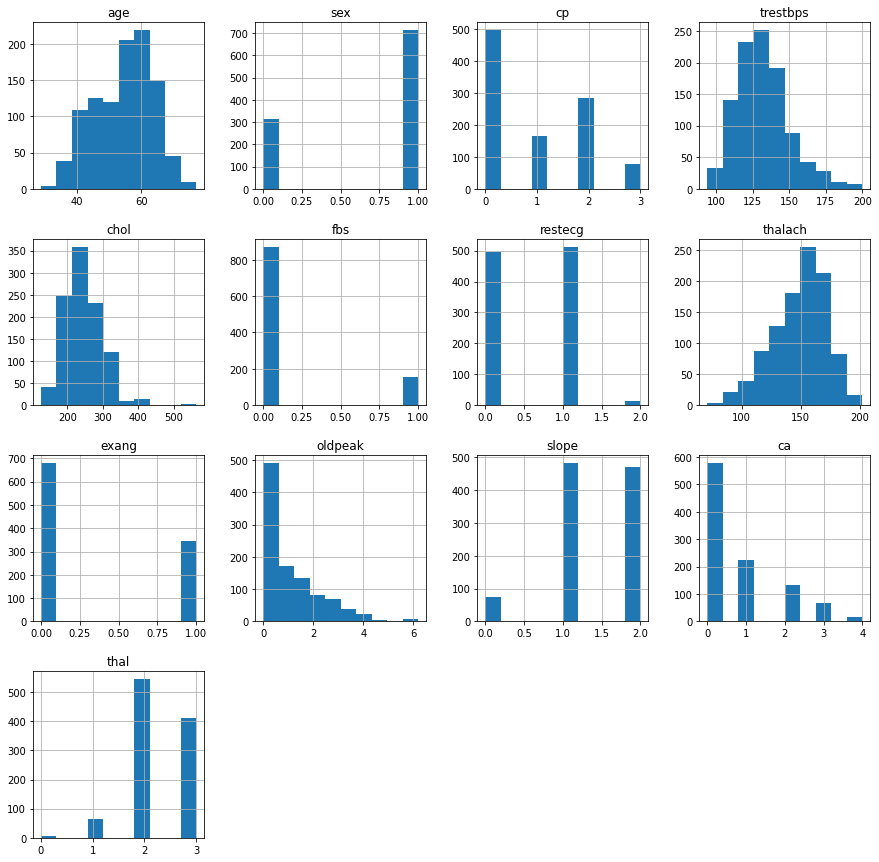

In [4]:
# Feature distribution
hist = x.hist(figsize=(15, 15))

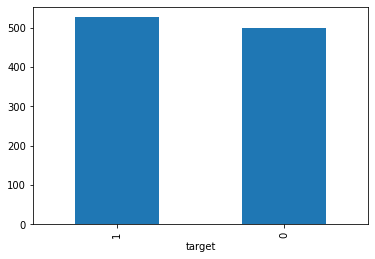

In [5]:
# Target distribution
bar = y.value_counts().plot.bar()

## 4. Preprocessing

In [6]:
# Splitting training, validation and test set
x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.33, random_state=42)

In [7]:
# Scaler
sds = StandardScaler()

# Scaling train set
x_train = pd.DataFrame(sds.fit_transform(x_train), columns = x_train.columns)

# Scaling validation set
x_val = pd.DataFrame(sds.transform(x_val), columns = x_val.columns)

## 5. Machine Learning

### 5.1. Model

In [8]:
# Model
model = RandomForestClassifier(random_state=1)

### 5.2 Training

In [9]:
# Training step
model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

### 5.3 Validation

In [10]:
# Validation step
y_pred_val = model.predict(x_val)

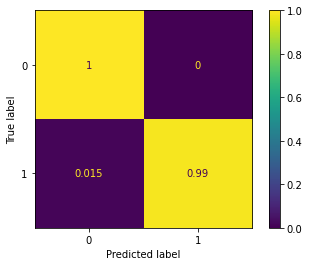

In [11]:
# Confusion_matrix for validation output
cmat = confusion_matrix(y_val, y_pred_val, labels=model.classes_, normalize="true")
disp_cmat = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=model.classes_)
disp_cmat.plot()

In [12]:
# Classification report for validation output
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       137
           1       1.00      0.99      0.99       137

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274



### 5.4 Testing

In [13]:
# Scaling test set
for i in range(len(x_test.columns)):
    x_test.iloc[:, i] = (x_test.iloc[:, i]-sds.mean_[i])/math.sqrt(sds.var_[i])

In [14]:
# Testing step
y_pred_test = model.predict(x_test)

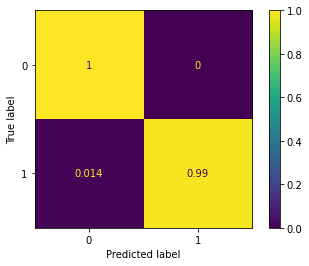

In [15]:
# Confusion_matrix for test output
cmat = confusion_matrix(y_test, y_pred_test, labels=model.classes_, normalize="true")
disp_cmat = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=model.classes_)
disp_cmat.plot()

In [16]:
# Classification report for test output
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.99      0.99        71

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136

